# Download the spleen dataset

In [2]:
!gdown --id 1jzeNU1EKnK81PyTsrx0ujfNl-t0Jo8uE

Downloading...
From: https://drive.google.com/uc?id=1jzeNU1EKnK81PyTsrx0ujfNl-t0Jo8uE
To: /content/Task09_Spleen.tar
1.61GB [00:19, 81.5MB/s]


# untar it 

In [ ]:
!tar -xvf /content/Task09_Spleen.tar

# EXPLORATORY DATA ANALYSIS OF THE SPLEEN DATASET

# Preparing the dataset for spleen segmentation

In [33]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import os
import shutil
import scipy.ndimage as nd

# Loading NIFTI images using NiBabel
NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - images and labels. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [7]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
images = glob("/content/data/Task09_Spleen/imagesTr/*.nii.gz")
labels = glob("/content/data/Task09_Spleen/labelsTr/*.nii.gz")
print(f"#images: {len(images)} and #labels: {len(labels)}")
print(images[9], labels[9])
image = nib.load(images[9])
label = nib.load(labels[9])

#images: 41 and #labels: 41
/content/data/Task09_Spleen/imagesTr/spleen_2.nii.gz /content/data/Task09_Spleen/labelsTr/spleen_2.nii.gz


# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
#### The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
#### In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
#### by accessing the .shape attribute. What are the dimensions of the input arrays?

image_data.shape: (512, 512, 90), label_data.shape: (512, 512, 90)


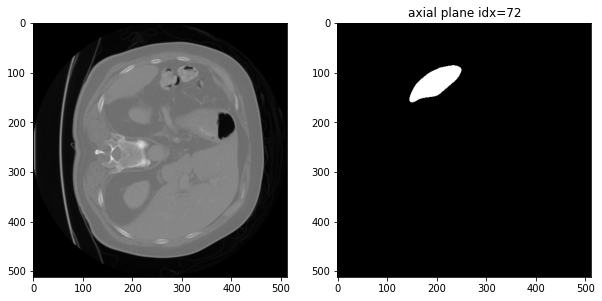

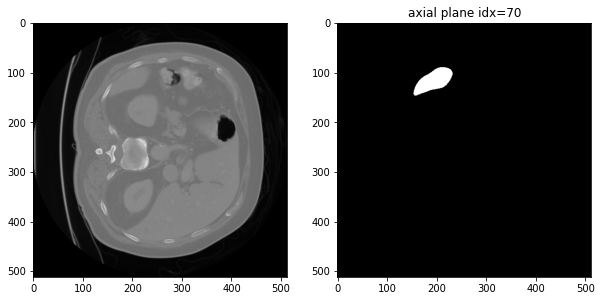

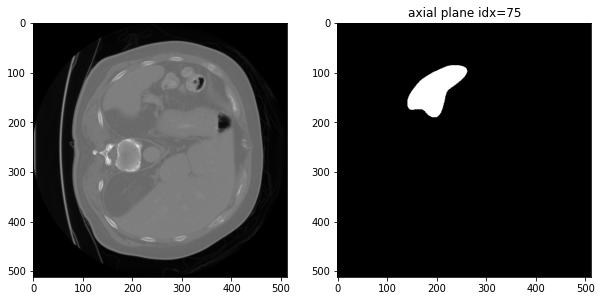

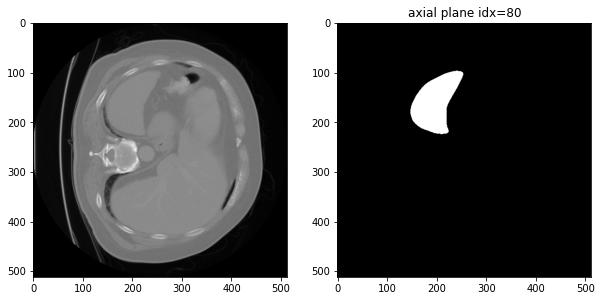

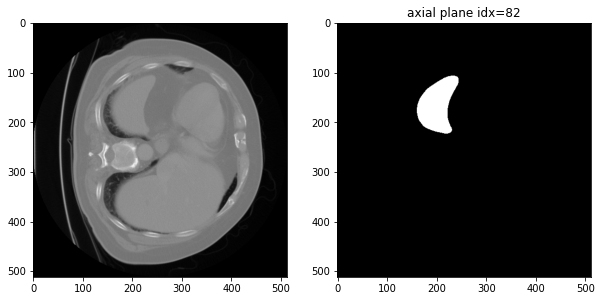

In [12]:


# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)

image_data = image.get_fdata()
label_data = label.get_fdata()

print(f"image_data.shape: {image_data.shape}, label_data.shape: {label_data.shape}")

def plot_img(idx):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_data[:,:,idx], cmap='gray')

    plt.subplot(1,2,2)
    plt.imshow(label_data[:,:,idx]*500, cmap='gray')
    plt.title(f"axial plane idx={idx}")
    plt.show()

plot_img(72)
plot_img(70)
plot_img(75)
plot_img(80)
plot_img(82)

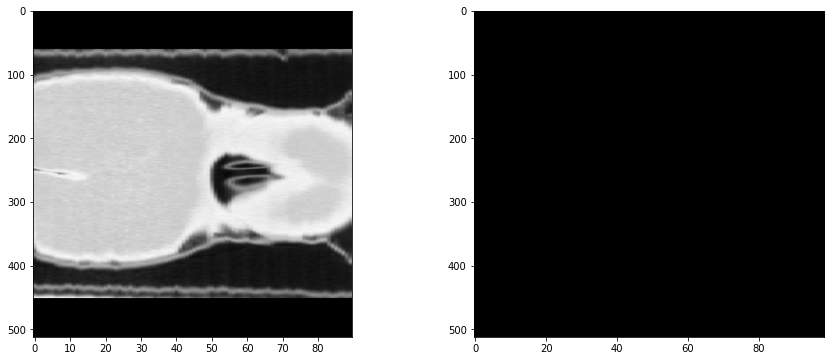

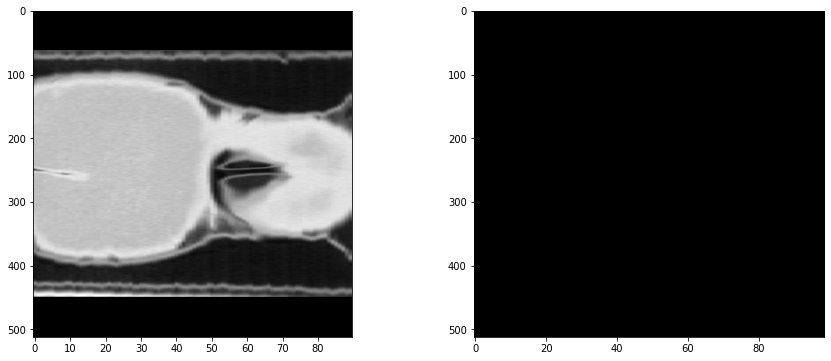

In [61]:
def plot_img(idx):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(image_data[:,idx,:], cmap='gray',aspect=.18)

    plt.subplot(1,2,2)
    plt.imshow(label_data[:,idx,:]*500, cmap='gray', aspect=.18)
    plt.show()

plot_img(89)
plot_img(87)


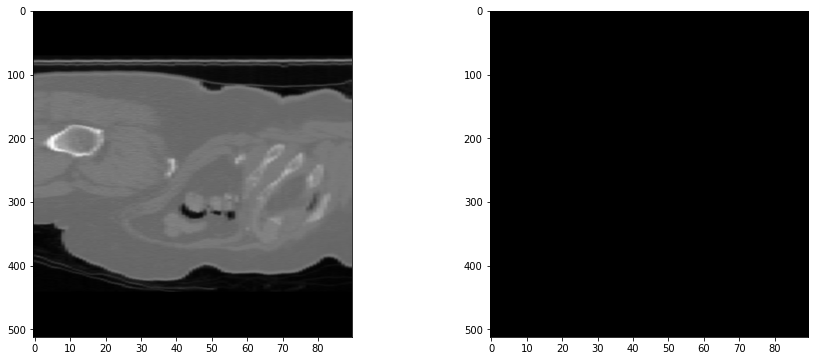

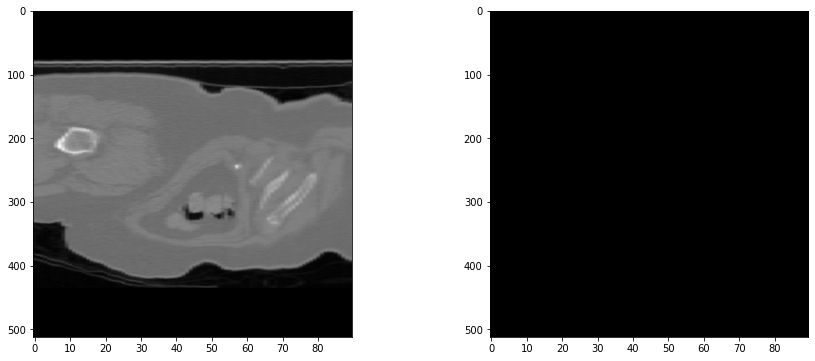

In [31]:
def plot_img(idx):
    plt.figure(figsize=(15,6))
    plt.title("CORONAL PLANE ")
    plt.subplot(1,2,1)
    plt.imshow(image_data[idx,:,:], cmap='gray',aspect=.18)

    plt.subplot(1,2,2)
    plt.imshow(label_data[idx,:,:], cmap='gray', aspect=.18)
    plt.show()

plot_img(78)
plot_img(72)


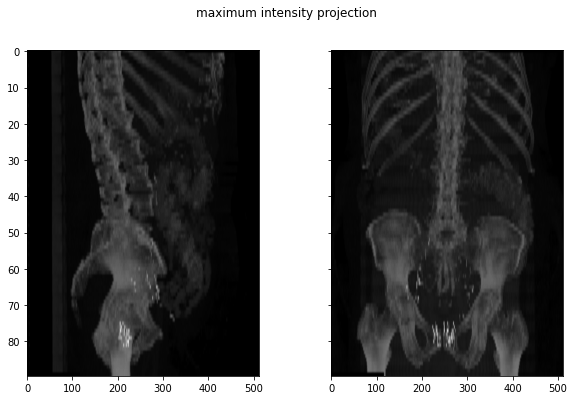

In [57]:
img_np = image_data
img_np.shape

mip01 = np.zeros((img_np.shape[1], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[0]):
    mip01 = np.maximum(mip01, img_np[z,:,:])
    
mip02 = np.zeros((img_np.shape[0], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[1]):
     mip02 = np.maximum(mip02, img_np[:,z,:])
        
mip03 = np.zeros((img_np.shape[0], img_np.shape[1]))
# SOLUTION (TODO)
for z in range (img_np.shape[2]):
     mip03 = np.maximum(mip03, img_np[:,:,z])
   
aspect_ratio = 8
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
axs[0].imshow(nd.rotate(mip01, 90), cmap="gray",aspect = aspect_ratio)
axs[1].imshow(nd.rotate(mip02, 90), cmap="gray",aspect = aspect_ratio)
#axs[2].imshow(nd.rotate(mip03, 90), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()



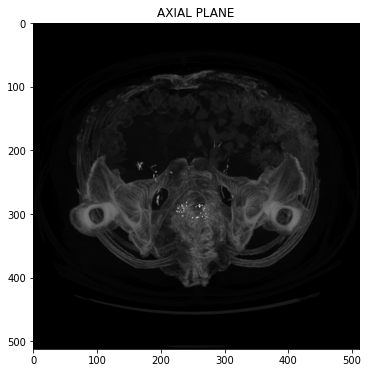

In [58]:
plt.figure(figsize=(10,6))
plt.title("AXIAL PLANE")
plt.imshow(nd.rotate(mip03, 90), cmap="gray")

# Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [41]:
print(image.header_class)
print(label.header_class)
print(image.header)
print("=====================================================================================================================")
print(label.header)

<class 'nibabel.nifti1.Nifti1Header'>
<class 'nibabel.nifti1.Nifti1Header'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.794922 0.794922 5.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d  

#  TASK: How many bits per pixel are used?


In [42]:

print(f"bits per pixel: {image.header['bitpix']}")

bits per pixel: 32


# # TASK: What are the units of measurement?

In [43]:
spatial_unit, temporal_unit = image.header.get_xyzt_units()

print(f"Spatial unit: {spatial_unit}, Temporal unit: {temporal_unit}")

Spatial unit: mm, Temporal unit: sec


# TASK: Do we have a regular grid? What are grid spacings?

In [44]:
print(f"Grid is regular with grid spacings: {image.header['pixdim']}")

Grid is regular with grid spacings: [1.       0.794922 0.794922 5.       0.       0.       0.       0.      ]


# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?


In [45]:
print(f"Sagittal: 0, Axial: 1, Coronal: 2")

Sagittal: 0, Axial: 1, Coronal: 2


# Compute the volume (in mm³) of a spleen using one of the labels you've loaded. 


In [48]:
print(f'the volume (in mm³) of a spleen: {np.count_nonzero(label_data)}')

the volume (in mm³) of a spleen: 96672


# Plotting some charts

### Plot a histogram of all volumes that we have in our dataset and see how 
### our dataset measures against a slice of a normal population represented by the chart below.

(array([2., 1., 1., 2., 1., 1., 3., 3., 1., 1., 0., 2., 0., 2., 7., 1., 2.,
        0., 0., 1., 2., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 20702.  ,  25871.83,  31041.66,  36211.49,  41381.32,  46551.15,
         51720.98,  56890.81,  62060.64,  67230.47,  72400.3 ,  77570.13,
         82739.96,  87909.79,  93079.62,  98249.45, 103419.28, 108589.11,
        113758.94, 118928.77, 124098.6 , 129268.43, 134438.26, 139608.09,
        144777.92, 149947.75, 155117.58, 160287.41, 165457.24, 170627.07,
        175796.9 , 180966.73, 186136.56, 191306.39, 196476.22, 201646.05,
        206815.88, 211985.71, 217155.54, 222325.37, 227495.2 , 232665.03,
        237834.86, 243004.69, 24

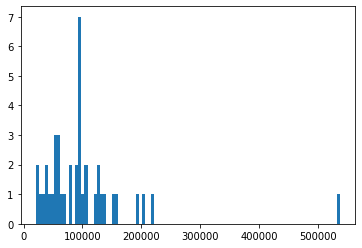

In [54]:
volumes = [np.count_nonzero(nib.load(l).get_fdata()) for l in labels]
plt.hist(volumes, bins=100)

# Is there any outlier ?

In [56]:
print("one outlier above 500000")

one outlier above 500000


# Label files

In [51]:
label_files = []
for lbl in labels:
    label = nib.load(lbl)
    label_data = label.get_fdata()
    volume = np.count_nonzero(label_data)
    if volume < 500000:
        label_files.append(os.path.basename(lbl))
                
print(len(label_files))

40


# TRAINING THE MODEL 

In [ ]:
!python training.py

# RUN THE INFERNECE ON THE MODEL

In [5]:
!python inference.py

cuda
affine : [[   0.68359399    0.            0.         -349.31652832]
 [   0.            0.68359399    0.         -349.31652832]
 [   0.            0.            5.            0.        ]
 [   0.            0.            0.            1.        ]]


# CALCULATE THE PERFORMANCE OF THE MODEL

In [6]:
!python evaluation.py

DSC: 0.493260987705606
Sensitivity: 0.32943273462500283


In [ ]:
!pip install pydicom

In [26]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import pydicom

In [16]:
img = nib.load("/content/data/spleen1_img.nii.gz")

In [17]:
img_np = img.get_fdata()
img_np.shape

(512, 512, 65)

Text(0.5, 0.98, 'orthogonal projection')

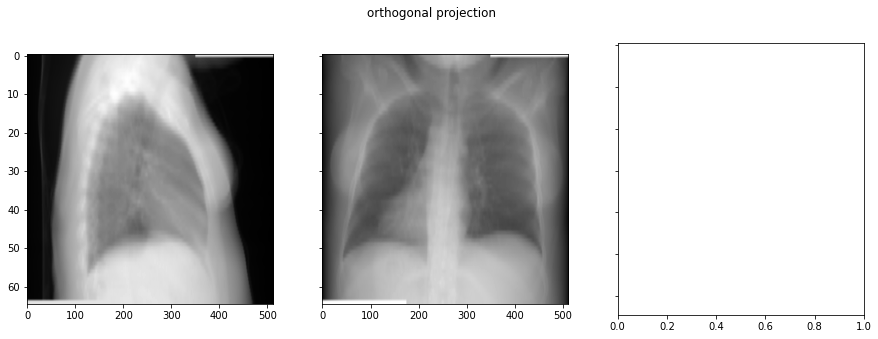

In [48]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as nd

img = img

img_np = img.get_fdata()
img_np.shape

vr01 = np.zeros((img_np.shape[1], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[0]):
    vr01 += img_np[z,:,:]
    
vr02 = np.zeros((img_np.shape[0], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[1]):
    vr02 += img_np[:,z,:]
vr03 = np.zeros((img_np.shape[0], img_np.shape[1]))
# SOLUTION (TODO)
for z in range (img_np.shape[2]):
    vr03 += img_np[:,:,z]
   
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].imshow(nd.rotate(vr01, 90), cmap="gray" , aspect = aspect_ratio)
axs[1].imshow(nd.rotate(vr02, 90), cmap="gray",  aspect = aspect_ratio)
#axs[2].imshow(nd.rotate(vr03, 90), cmap="gray")
fig.suptitle('orthogonal projection')



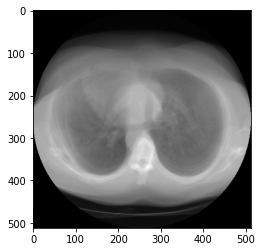

In [50]:
plt.imshow(nd.rotate(vr03, 90), cmap="gray")

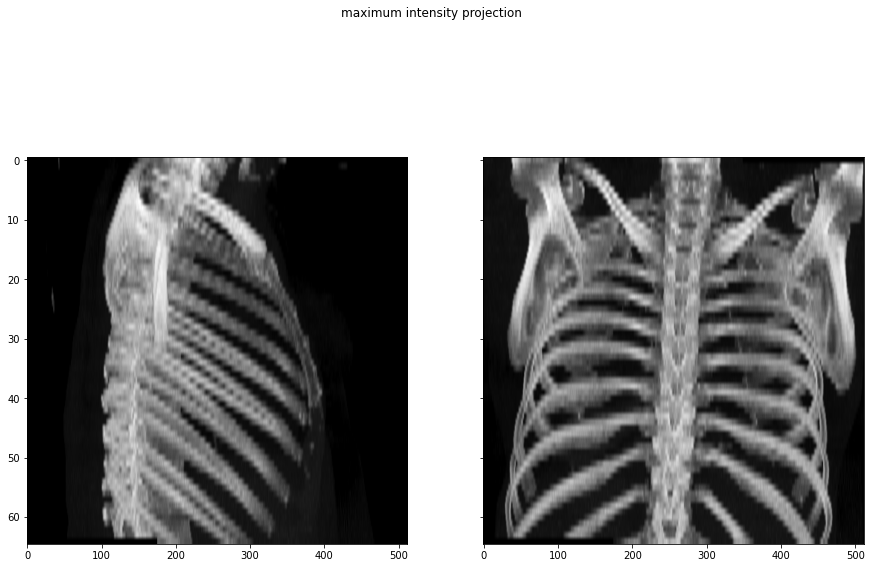

In [51]:
img_np = img.get_fdata()
img_np.shape

mip01 = np.zeros((img_np.shape[1], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[0]):
    mip01 = np.maximum(mip01, img_np[z,:,:])
    
mip02 = np.zeros((img_np.shape[0], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[1]):
     mip02 = np.maximum(mip02, img_np[:,z,:])
        
mip03 = np.zeros((img_np.shape[0], img_np.shape[1]))
# SOLUTION (TODO)
for z in range (img_np.shape[2]):
     mip03 = np.maximum(mip03, img_np[:,:,z])
   
aspect_ratio = 8
fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
axs[0].imshow(nd.rotate(mip01, 90), cmap="gray",aspect = aspect_ratio)
axs[1].imshow(nd.rotate(mip02, 90), cmap="gray",aspect = aspect_ratio)
#axs[2].imshow(nd.rotate(mip03, 90), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()



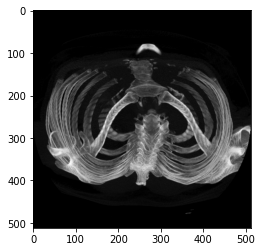

In [49]:
plt.imshow(nd.rotate(mip03, 90), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()
